In [1]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from enum import Enum
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder
from scipy.special import boxcox1p

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [36]:
train = pd.read_csv('data/train.csv',index_col = 'Id')
print(train.head())
train.info()




    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig    ...     PoolArea PoolQC Fence  \
Id                                    ...                             
1          Lvl    AllPub    Inside    ...            0    NaN   NaN   
2          Lvl    AllPub       FR2    ...            0    NaN   NaN   
3          Lvl    AllPub    Inside    ...            0    NaN   NaN   
4          Lvl    AllPub    Corner    ...            0    NaN   NaN   
5          Lvl    AllPub       FR2    ...            0    NaN   NaN   

   M

NameError: name 'index_col' is not defined

In [41]:
train.index.names = ['train_ID']
test = pd.read_csv('data/test.csv' )



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [49]:
test.rename({'test_ID':'Id'}, inplace = True)
test.test_ID = test.Id
test.drop('Id', axis=1, inplace=True)


AttributeError: 'DataFrame' object has no attribute 'Id'

## STEP2: data processing

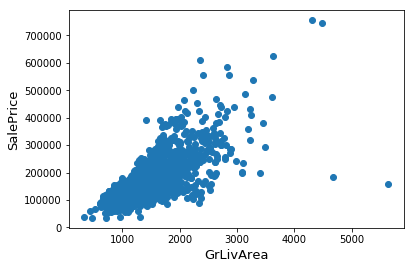

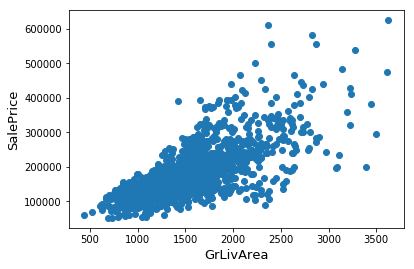

In [53]:
def display_outlier(pd, feature):
    fig, ax = plt.subplots()
    ax.scatter(x = pd[feature], y = pd['SalePrice'])
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel(feature, fontsize=13)
    plt.show()
    
    
display_outlier(train,'GrLivArea')

# analyze and remove huge outliers: GrLivArea, ...

train = train[(train['GrLivArea']<4000) & (train['SalePrice']>50000)]

display_outlier(train, 'GrLivArea')

In [54]:
def display_distrib(pd, feature):
    plt.figure()
    sns.distplot(pd[feature].dropna() , fit=norm);
    (mu, sigma) = norm.fit(pd[feature].dropna())    
    
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
    plt.ylabel('Frequency')
    plt.title('SalePrice distribution')
    plt.show()

/Users/lipengyuan/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


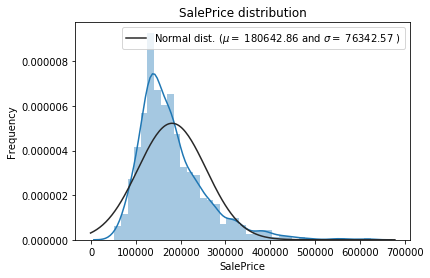

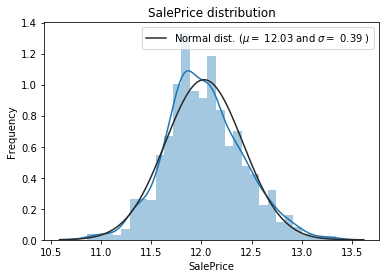

In [17]:
 # normalize distribution of output (SalePrice)
display_distrib(train, 'SalePrice')
train["SalePrice"] = np.log1p(train["SalePrice"])
y_train = train.SalePrice.values
display_distrib(train, 'SalePrice')

In [55]:
# concatenate the train and test data
ntrain = train.shape[0]
ntest = test.shape[0]
train.drop(['SalePrice'], axis=1, inplace=True)
all_data = pd.concat((train, test)).reset_index(drop=True)
print('[data_processing] ', 'all_data size is : {}'.format(all_data.shape))    
    
# fill missing data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
print('[data_processing] ', missing_data)

all_data["PoolQC"] = all_data["PoolQC"].fillna("None") #data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None") #data description says NA means "no misc feature"
all_data["Alley"] = all_data["Alley"].fillna("None") #data description says NA means "no alley access"
all_data["Fence"] = all_data["Fence"].fillna("None") #NA means "no fence"
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None") #NA means "no fireplace"
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))  # fill by the median LotFrontage of all neighborhood because they have same lot frontage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None') #NaN means that there is no basement
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None") #NA means no masonry veneer
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0) #NA means no masonry veneer
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1) #For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it
all_data["Functional"] = all_data["Functional"].fillna("Typ") #data description says NA means typical
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0]) #It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0]) #Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0]) #Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0]) #Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0]) #Fill in again with most frequent which is "WD"
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None") #Na most likely means No building class. We can replace missing values with None
    
    # add important features more
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF'] #feature which is the total area of basement, first and second floor areas of each house
    
    # normalize skewed features
for feature in all_data:
    if all_data[feature].dtype != "object":
                #display_distrib(all_data, feature)
        all_data[feature] = np.log1p(all_data[feature])
                #display_distrib(all_data, feature)
                
    # transform numeric features into categorical features
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallQual'] = all_data['OverallQual'].astype(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)
    
    # encode categorical features by LabelEncoder or dummies
    # do label encoding for categorical features
categorical_features = \
    ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
     'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
     'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
     'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallQual',
     'OverallCond', 'YrSold', 'MoSold')
for c in categorical_features:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))
print('[data_processing] ', 'Shape all_data: {}'.format(all_data.shape))
    # get dummy categorical features
all_data = pd.get_dummies(all_data)
print('[data_processing] ', all_data.shape)
    
train = all_data[:ntrain]
test = all_data[ntrain:]

[data_processing]  all_data size is : (2910, 79)
[data_processing]                Missing Ratio
PoolQC            99.725086
MiscFeature       96.391753
Alley             93.230241
Fence             80.515464
FireplaceQu       48.625430
LotFrontage       16.701031
GarageFinish       5.360825
GarageYrBlt        5.360825
GarageQual         5.360825
GarageCond         5.360825
GarageType         5.292096
BsmtExposure       2.783505
BsmtCond           2.783505
BsmtQual           2.749141
BsmtFinType2       2.714777
BsmtFinType1       2.680412
MasVnrType         0.824742
MasVnrArea         0.790378
MSZoning           0.137457
BsmtFullBath       0.068729
BsmtHalfBath       0.068729
Utilities          0.068729
Functional         0.068729
Exterior2nd        0.034364
Exterior1st        0.034364
SaleType           0.034364
BsmtFinSF1         0.034364
BsmtFinSF2         0.034364
BsmtUnfSF          0.034364
Electrical         0.034364
[data_processing]  Shape all_data: (2910, 79)
[data_processing] 

In [0]:
### STEP1: settings
class Settings(Enum):
    train_path    = 'sample_data/train.csv'
    test_path     = 'sample_data/test.csv'

    def __str__(self):
        return self.value
    
    

In [0]:

    
        

                        
# def process_data(train_path, test_path):
#     print('[data_processing] ', train_path)
#     print('[data_processing] ', test_path)
    
#     global train
#     global test
#     global y_train
#     global train_ID
#     global test_ID
   

  
  
  
    
#     # concatenate the train and test data
#     ntrain = train.shape[0]
#     ntest = test.shape[0]
#     train.drop(['SalePrice'], axis=1, inplace=True)
#     all_data = pd.concat((train, test)).reset_index(drop=True)
#     print('[data_processing] ', 'all_data size is : {}'.format(all_data.shape))    
    
#     # fill missing data
#     all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
#     all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
#     missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
#     print('[data_processing] ', missing_data)

#     all_data["PoolQC"] = all_data["PoolQC"].fillna("None") #data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.
#     all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None") #data description says NA means "no misc feature"
#     all_data["Alley"] = all_data["Alley"].fillna("None") #data description says NA means "no alley access"
#     all_data["Fence"] = all_data["Fence"].fillna("None") #NA means "no fence"
#     all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None") #NA means "no fireplace"
#     all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))  # fill by the median LotFrontage of all neighborhood because they have same lot frontage
#     for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
#         all_data[col] = all_data[col].fillna('None')
#     for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
#         all_data[col] = all_data[col].fillna(0)
#     for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
#         all_data[col] = all_data[col].fillna(0)
#     for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
#         all_data[col] = all_data[col].fillna('None') #NaN means that there is no basement
#     all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None") #NA means no masonry veneer
#     all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0) #NA means no masonry veneer
#     all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
#     all_data = all_data.drop(['Utilities'], axis=1) #For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it
#     all_data["Functional"] = all_data["Functional"].fillna("Typ") #data description says NA means typical
#     all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0]) #It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
#     all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0]) #Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual
#     all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0]) #Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
#     all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0]) #Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
#     all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0]) #Fill in again with most frequent which is "WD"
#     all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None") #Na most likely means No building class. We can replace missing values with None
    
#     # add important features more
#     all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF'] #feature which is the total area of basement, first and second floor areas of each house
    
#     # normalize skewed features
#     for feature in all_data:
#         if all_data[feature].dtype != "object":
#                 #display_distrib(all_data, feature)
#                 all_data[feature] = np.log1p(all_data[feature])
#                 #display_distrib(all_data, feature)
                
#     # transform numeric features into categorical features
#     all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
#     all_data['OverallQual'] = all_data['OverallQual'].astype(str)
#     all_data['OverallCond'] = all_data['OverallCond'].astype(str)
#     all_data['YrSold'] = all_data['YrSold'].astype(str)
#     all_data['MoSold'] = all_data['MoSold'].astype(str)
    
#     # encode categorical features by LabelEncoder or dummies
#     # do label encoding for categorical features
#     categorical_features = \
#     ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
#      'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
#      'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
#      'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallQual',
#      'OverallCond', 'YrSold', 'MoSold')
#     for c in categorical_features:
#         lbl = LabelEncoder() 
#         lbl.fit(list(all_data[c].values))
#         all_data[c] = lbl.transform(list(all_data[c].values))
#     print('[data_processing] ', 'Shape all_data: {}'.format(all_data.shape))
#     # get dummy categorical features
#     all_data = pd.get_dummies(all_data)
#     print('[data_processing] ', all_data.shape)
    
#     train = all_data[:ntrain]
#     test = all_data[ntrain:]
    

## STEP3: model

In [20]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
params = {'max_depth':range(2, 20), 'n_estimators':range(10, 2500, 10), 'learning_rate':[0.01,0.02,0.03,0.05, 0.1, 0.25, 0.5]}

xgbc_best = xgb.XGBRegressor()

gs = GridSearchCV(xgbc_best, params, n_jobs=-1, cv=5, verbose=1)

gs.fit(train, y_train)


Fitting 5 folds for each of 31374 candidates, totalling 156870 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.2s


KeyboardInterrupt: 

In [21]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": randint(2,20),
              'n_estimators':randint(10, 2500, 10),
              'learning_rate':[0.01,0.02,0.03,0.05, 0.1, 0.25, 0.5]}

# Instantiate 
xgbc_best = xgb.XGBRegressor()

# Instantiate the RandomizedSearchCV object: tree_cv

gs = RandomizedSearchCV(xgbc_best, param_dist, n_jobs=-1, cv=5, verbose=1)

# Fit it to the data
gs.fit(train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(gs.best_params_))
print("Best score is {}".format(gs.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.5min finished


Tuned Decision Tree Parameters: {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 685}
Best score is 0.9150792193014985


In [30]:
# model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                              learning_rate=0.03, max_depth=4, 
#                              min_child_weight=1.7817, n_estimators=685,
#                              reg_alpha=0.4640, reg_lambda=0.8571,
#                              subsample=0.5213, silent=1)
model_xgb = xgb.XGBRegressor(learning_rate=0.03, max_depth=4, n_estimators=685)

In [31]:
model_xgb.fit(train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.03, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=685,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [56]:
xgb_pred = np.expm1(model_xgb.predict(test))

In [60]:
test1 = pd.read_csv('data/test.csv')

In [61]:
sub = pd.DataFrame()
sub['Id'] = test1.Id

sub['SalePrice'] = xgb_pred
sub.to_csv('submission.csv',index=False)

In [0]:
    

class Averaging_Models(BaseEstimator, RegressorMixin, TransformerMixin):
     def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
     def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    # now we do the predictions for cloned models and average them
     def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)   
    

[data_processing]  sample_data/train.csv
[data_processing]  sample_data/test.csv
[data_processing]  The train data size before dropping Id: (1460, 81) 
[data_processing]  The test data size before dropping Id: (1459, 80) 
[data_processing]  The train data size after dropping Id: (1460, 80) 
[data_processing]  The test data size after dropping Id: (1459, 79) 


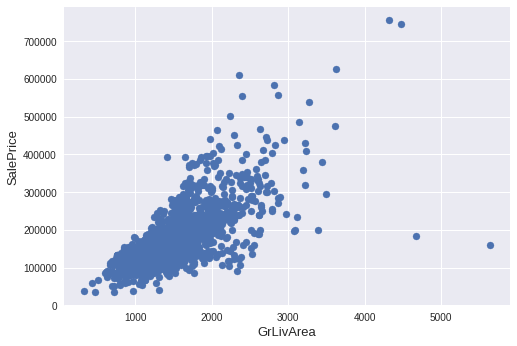

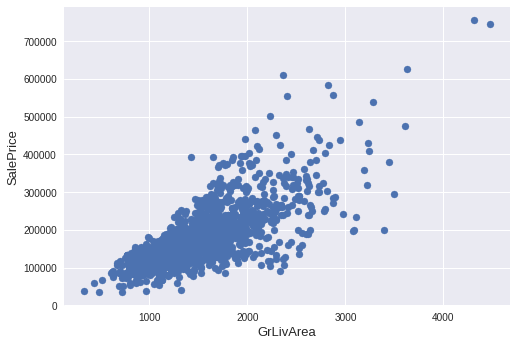

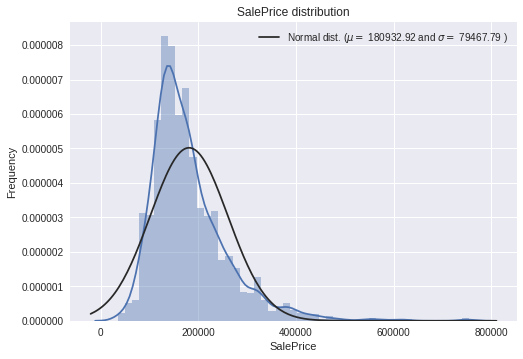

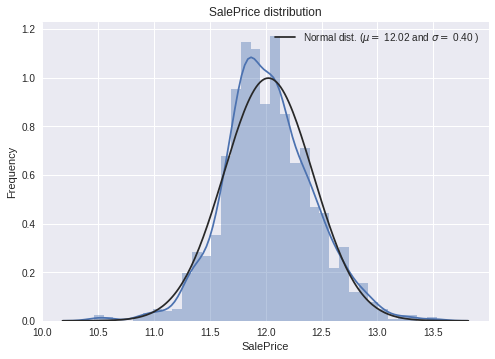

[data_processing]  all_data size is : (2917, 79)
[data_processing]                Missing Ratio
PoolQC            99.691464
MiscFeature       96.400411
Alley             93.212204
Fence             80.425094
FireplaceQu       48.680151
LotFrontage       16.660953
GarageFinish       5.450806
GarageYrBlt        5.450806
GarageQual         5.450806
GarageCond         5.450806
GarageType         5.382242
BsmtExposure       2.811107
BsmtCond           2.811107
BsmtQual           2.776826
BsmtFinType2       2.742544
BsmtFinType1       2.708262
MasVnrType         0.822763
MasVnrArea         0.788481
MSZoning           0.137127
BsmtFullBath       0.068564
BsmtHalfBath       0.068564
Utilities          0.068564
Functional         0.068564
Exterior2nd        0.034282
Exterior1st        0.034282
SaleType           0.034282
BsmtFinSF1         0.034282
BsmtFinSF2         0.034282
BsmtUnfSF          0.034282
Electrical         0.034282
[data_processing]  Shape all_data: (2917, 79)
[data_processing] 

In [0]:
class Stacking_Averaged_Models(BaseEstimator, RegressorMixin, TransformerMixin):
     def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # we again fit the data on clones of the original models
     def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=15)
        
        # train cloned base models then create out-of-fold predictions that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    # do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
     def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)
    
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


def model():
    # LASSO Regression
    lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
    
    score = rmsle_cv(lasso)
    print('[model] ', "Lasso score(cv): {:.4f} ({:.4f})".format(score.mean(), score.std()))
    
    # Elastic Net Regression
    ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
    
    score = rmsle_cv(ENet)
    print('[model] ', "ElasticNet score(cv): {:.4f} ({:.4f})".format(score.mean(), score.std()))
    
    # Kernel Ridge Regression
    KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
    
    score = rmsle_cv(KRR)
    print('[model] ', "Kernel Ridge score(cv): {:.4f} ({:.4f})".format(score.mean(), score.std()))
    
    # Gradient Boosting Regression
    GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
    
    score = rmsle_cv(GBoost)
    print('[model] ', "Gradient Boosting score(cv): {:.4f} ({:.4f})".format(score.mean(), score.std()))
    
    # XGBoost 
    model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1)
    
    score = rmsle_cv(model_xgb)
    print('[model] ', "Xgboost score(cv): {:.4f} ({:.4f})".format(score.mean(), score.std()))
    
    # LightGBM 
    model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

    score = rmsle_cv(model_lgb)
    print('[model] ', "LGBM score(cv): {:.4f} ({:.4f})" .format(score.mean(), score.std()))
    
    # averaged model
    averaged_models = Averaging_Models(models = (ENet, GBoost, KRR, lasso))    

    score = rmsle_cv(averaged_models)
    print('[model] ', "Averaged base models score(cv): {:.4f} ({:.4f})".format(score.mean(), score.std()))
    
    # stacked averaged model
    stacked_averaged_models = Stacking_Averaged_Models(base_models = (ENet, GBoost, KRR), meta_model = lasso)

    score = rmsle_cv(stacked_averaged_models)
    print('[model] ', "Stacked averaged-models score(cv): {:.4f} ({:.4f})".format(score.mean(), score.std()))    
        
    # StackedRegressor
    stacked_averaged_models.fit(train.values, y_train)
    stacked_train_pred = stacked_averaged_models.predict(train.values)
    stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
    print('[model] ', 'stacked regressor:', rmsle(y_train, stacked_train_pred))

    # XGBoost
    model_xgb.fit(train, y_train)
    xgb_train_pred = model_xgb.predict(train)
    xgb_pred = np.expm1(model_xgb.predict(test))
    print('[model] ', 'xgboost:', rmsle(y_train, xgb_train_pred))

    # LightGBM
    model_lgb.fit(train, y_train)
    lgb_train_pred = model_lgb.predict(train)
    lgb_pred = np.expm1(model_lgb.predict(test.values))
    print('[model] ', 'LightGBMs:', rmsle(y_train, lgb_train_pred))

    print('[model] ', 'ensemble:', rmsle(y_train,stacked_train_pred*0.70 + xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

    ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15
    
    sub = pd.DataFrame()
    sub['Id'] = test_ID
    sub['SalePrice'] = ensemble
    sub.to_csv('submission.csv',index=False)


### MAIN
process_data(Settings.train_path, Settings.test_path)
model()

print('The end!')